In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from global_import import *

In [125]:
FF = pd.read_csv(f'{PROJECT_FOLDER}/lookup_tables/FF3.csv')
FF['date'] = FF['Unnamed: 0']
FF['date'] = pd.to_datetime(FF['date'].astype(str), format='%Y%m%d')
FF['jdate'] = FF['date']+MonthEnd(0)
FF = FF[['jdate', 'date', 'RF']]

In [126]:
sp500 = pd.read_csv(f'{PROJECT_FOLDER}/lookup_tables/sp500.csv')
sp500['date'] = pd.to_datetime(sp500['Date'])

In [127]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927-12-30
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928-01-03
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928-01-04
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,1928-01-05
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,1928-01-06


In [128]:
sp500['ret_daily'] = sp500['Adj Close'].pct_change(1) 

In [129]:
FF = FF.merge(sp500[['date', 'ret_daily']], on=['date'], how='inner')

In [130]:
FF = FF.dropna()

In [131]:
FF['mp_daily'] = FF['ret_daily'] - (FF['RF']/100)

In [132]:
FF['mp_10yr'] = FF['mp_daily'].rolling(2520, min_periods=2520).mean()
FF['mp_10yr'] = (1+FF['mp_10yr']).pow(365)-1

In [133]:
FF1 = FF.set_index('date')

<AxesSubplot:xlabel='date'>

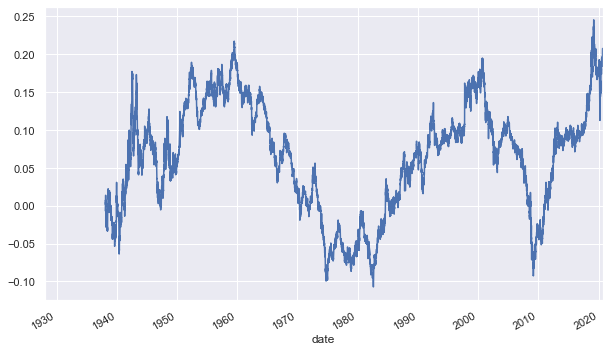

In [134]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
FF1['mp_10yr'].plot()

In [135]:
(1+FF[FF.date.dt.year>1978]['mp_daily'].mean())**252-1

0.061899977279435525

In [137]:
FF[['date', 'mp_10yr']].to_csv(f'{PROJECT_FOLDER}/lookup_tables/erp.csv')